In [1]:
%cd /Users/monica_air/Documents/GitHub/Sign_recognition/py

from basic_preprocessing import *
from machine_learning import *
%cd /Users/monica_air/Documents/Sign recognition/decriptor

/Users/monica_air/Documents/GitHub/Sign_recognition/py
/Users/monica_air/Documents/Sign recognition/decriptor


(4032, 3024, 3)


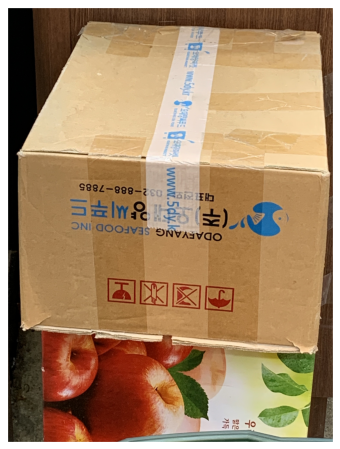

In [2]:
img_ORG =INPUT_IMG('/Users/monica_air/Documents/Sign recognition/Datasets/Didnt use/KakaoTalk_20211006_133834621_01.jpg')
print(img_ORG.shape)
show(img_ORG)

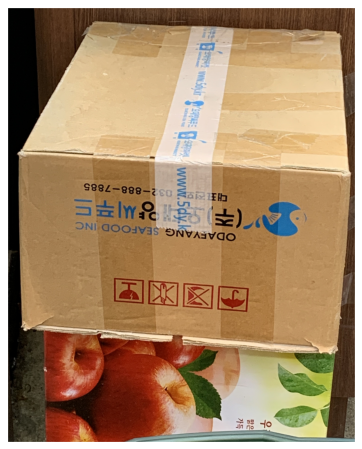

In [3]:
resize =cv2.resize(img_ORG, (800,1000))
img =resize.copy()
show(img)

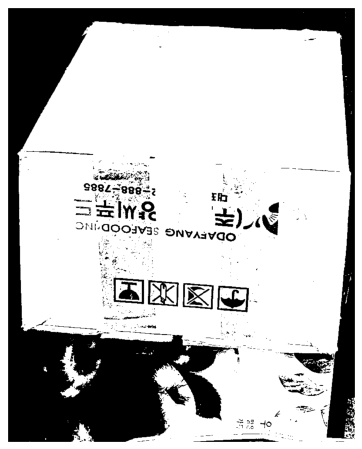

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
show(img_bin)

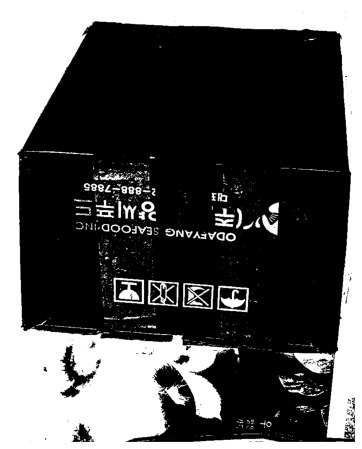

In [5]:
img_bin = 255-img_bin
show(img_bin)

In [6]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

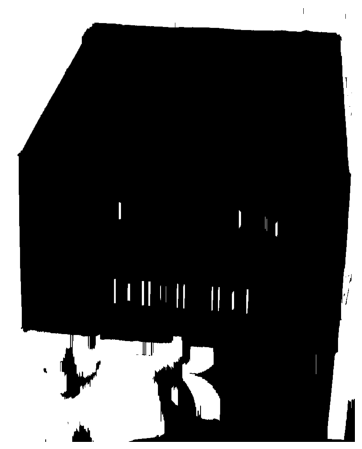

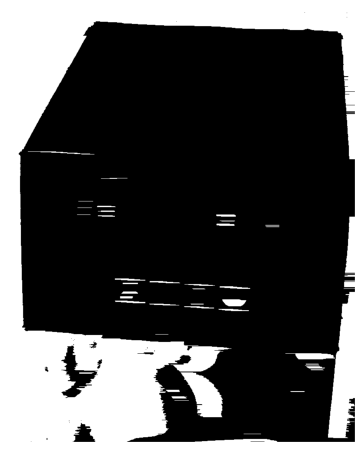

In [7]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
# cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
show(verticle_lines_img)
show(horizontal_lines_img)

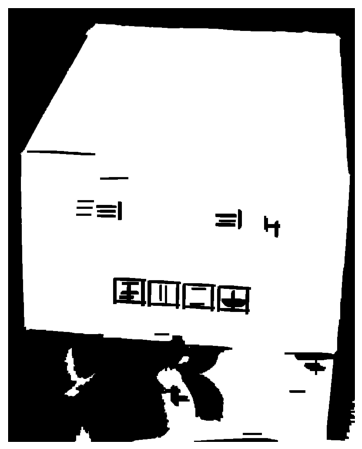

In [8]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2.imwrite("img_final_bin.jpg",img_final_bin)Thank
show(img_final_bin)

In [9]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [10]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

new_images = []
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 80 and h > 15) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        new_images.append(new_img)
        show(new_img)

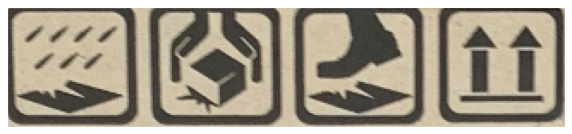

In [32]:
show(new_images[0])

### **only mark**

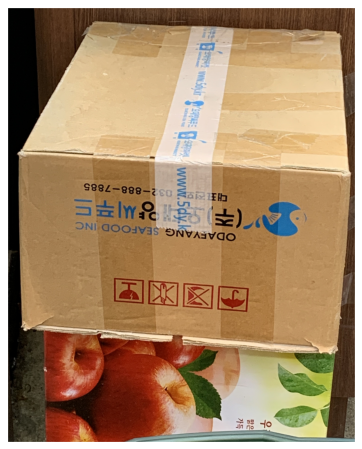

In [12]:
show(resize)

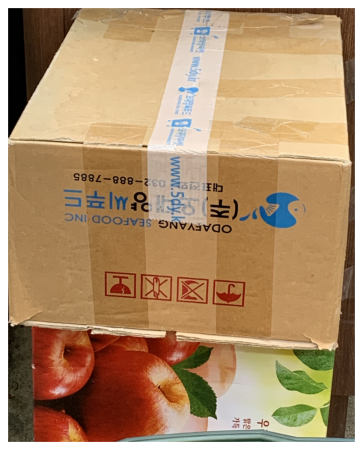

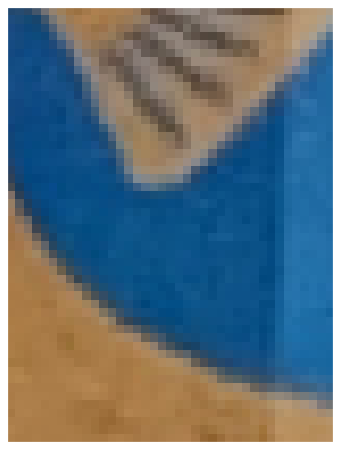

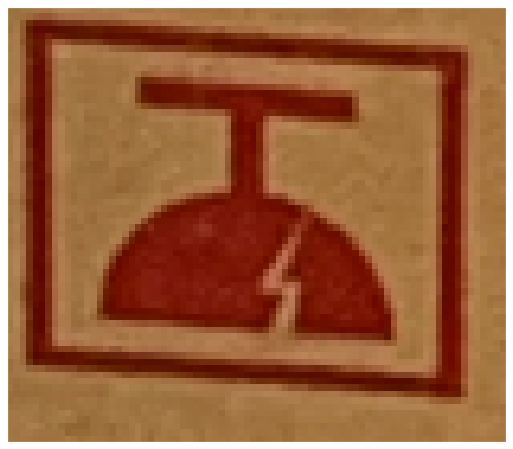

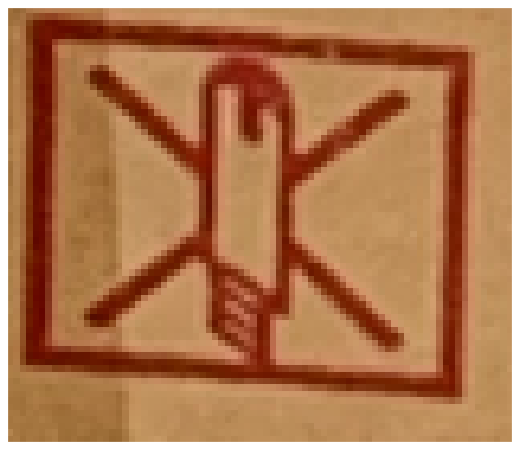

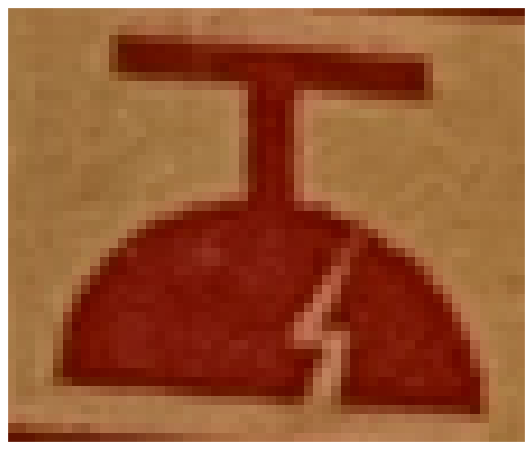

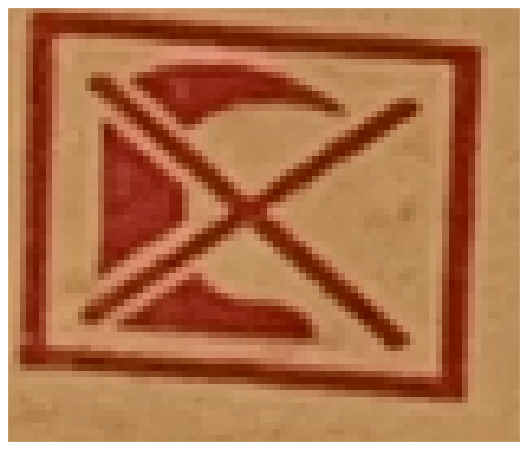

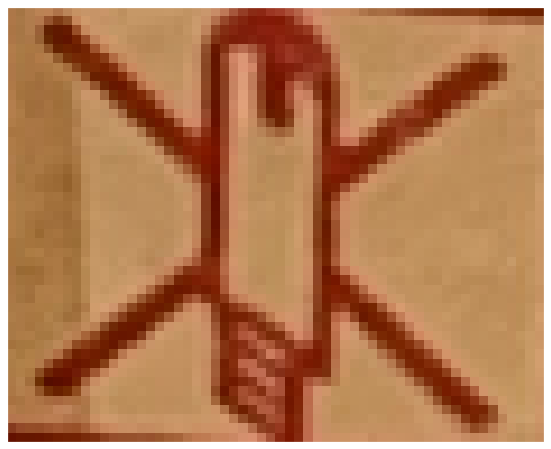

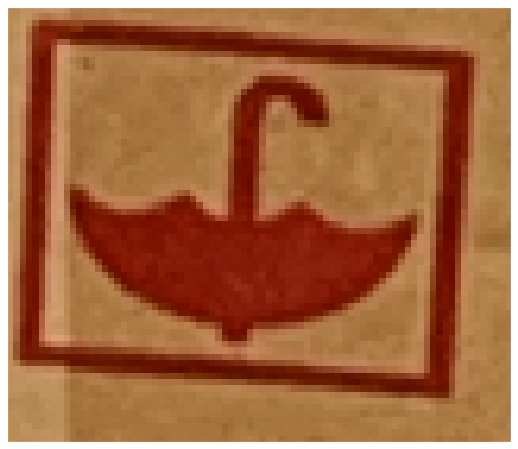

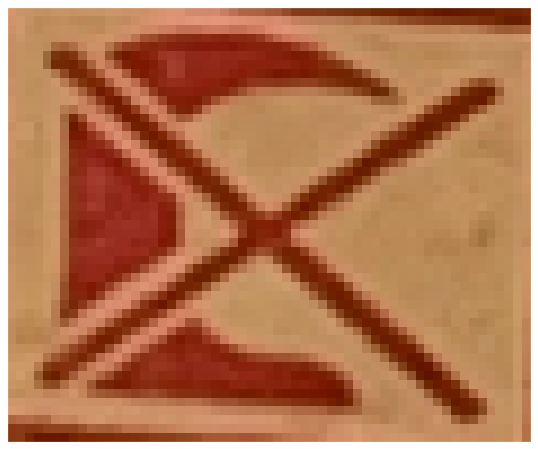

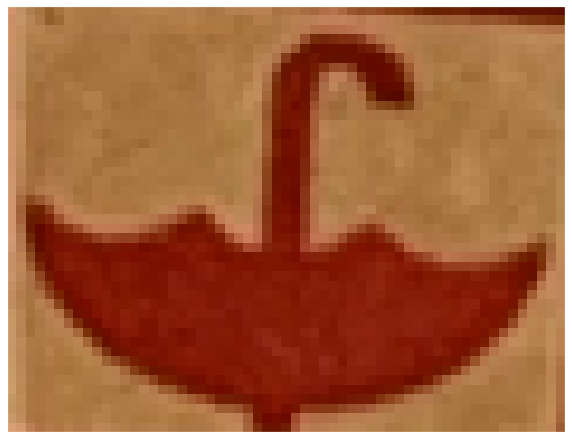

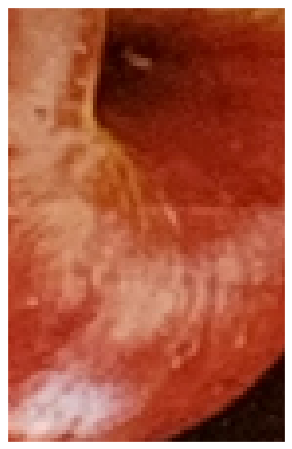

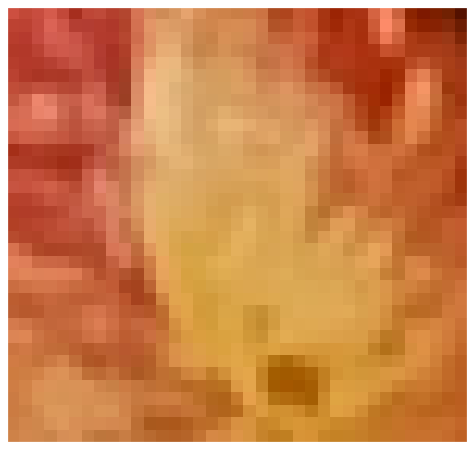

In [16]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

ver_images = []
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (w > 30 and h > 20) :
        idx += 1
        ver_img = img[y:y+h, x:x+w]
        ver_images.append(ver_img)
        show(ver_img)

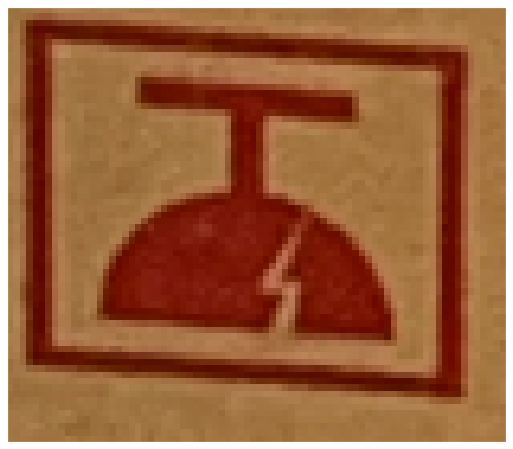

In [15]:
show(ver_images[2])

In [17]:
ver_images[2].shape

(68, 78, 3)

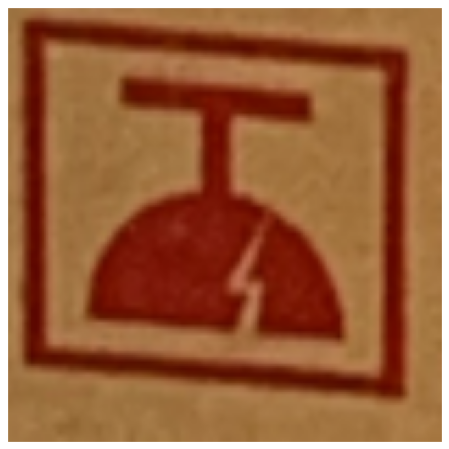

In [18]:
resizing = cv2.resize(ver_images[2].copy(),(200,200))
show(resizing)

In [51]:
ver_images[1].shape

(52, 39, 3)

In [66]:
print(len(ver_images[1:]))

x=0
y=0
for i in ver_images[1:]:
    a,b,c = i.shape
    x+=a
    y+=b

mean_x = x/len(ver_images)
mean_y = y/len(ver_images)
print(x/len(ver_images))
print(y/len(ver_images))

11
54.833333333333336
57.916666666666664


6


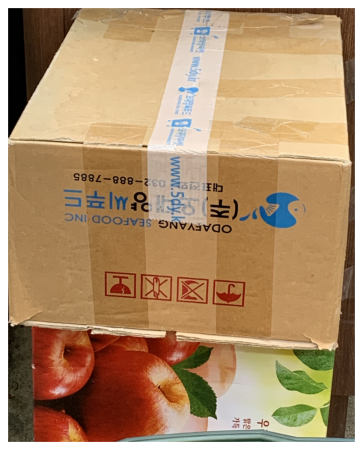

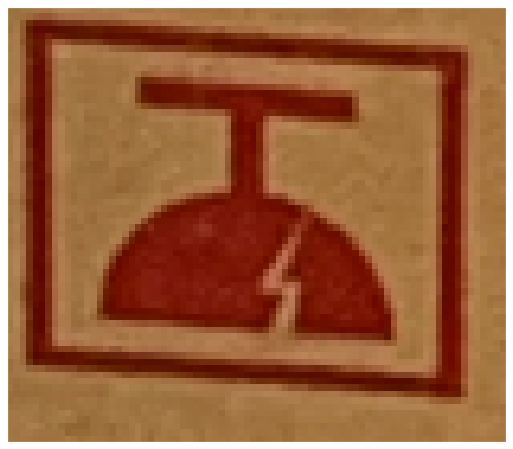

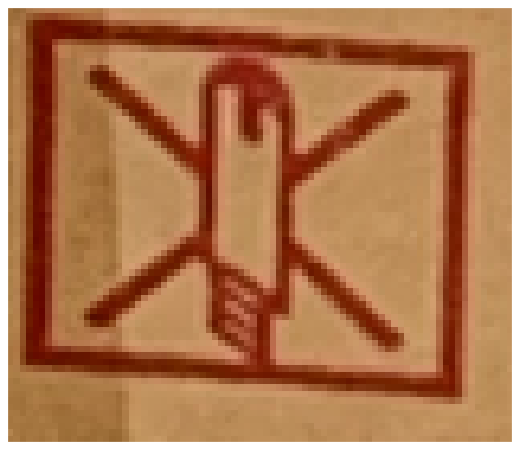

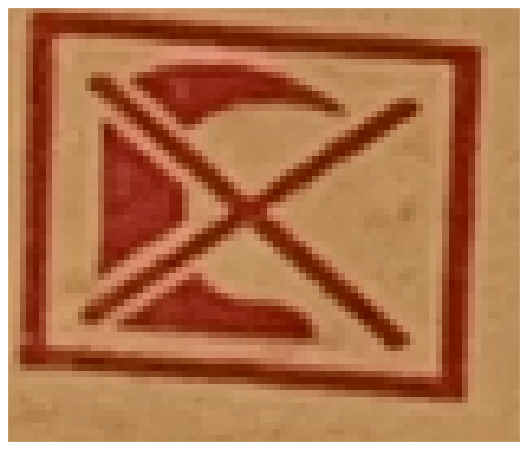

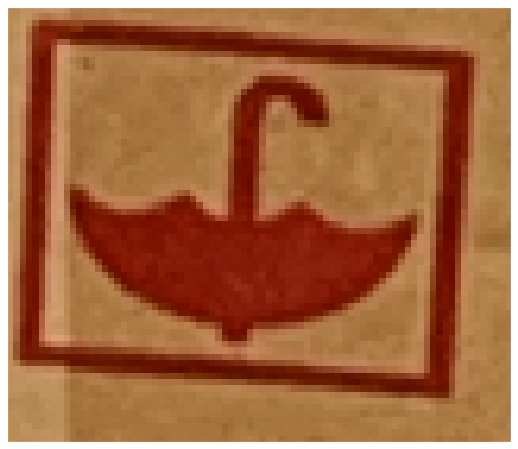

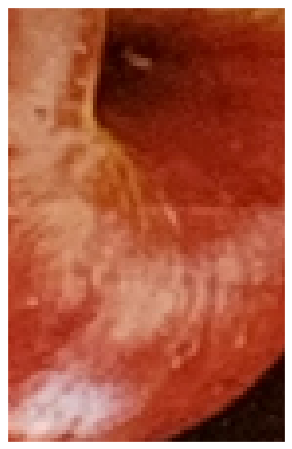

In [67]:
get=[]
for i in ver_images:
    a,b,c = i.shape
    if a >mean_x and b>mean_y:
        get.append(i)
        
print(len(get))
for i in get:
    show(i)